In [22]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
    
def fact(n):
    if n == 1 or n == 0:
        return 1
    else :
        return n * fact(n-1)
    
cpn = np.zeros((200,200))
cpn[:,0] = 1
for i in range(1,200) :
    for j in range(1,i+1) :
        cpn[i][j] = cpn[i-1][j-1] + cpn[i-1][j]

def binomial(k,n,p):
    return cpn[n][k] * p**k * (1-p)**(n-k)

def normal(x,m,s):
    return np.exp(-(x-m)**2 / (2 * s**2)) / (s * (2*math.pi)**0.5)
    
def poisson(k,l):
    return l**k * np.exp(-l) / fact(k)

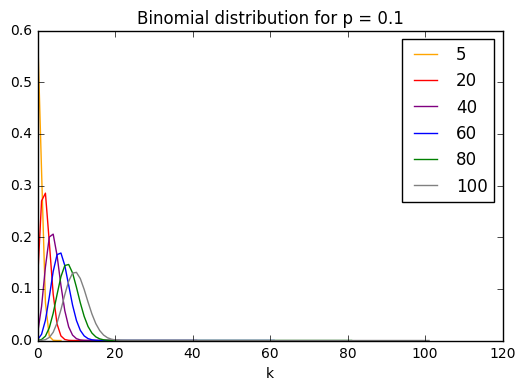

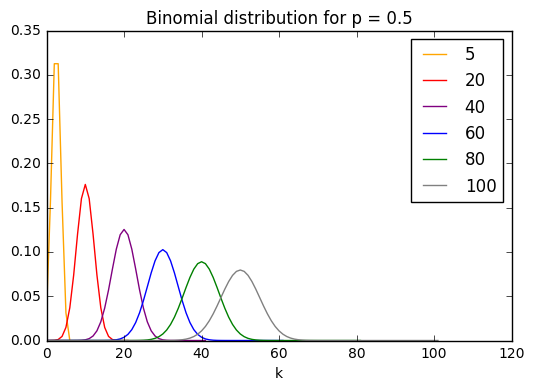

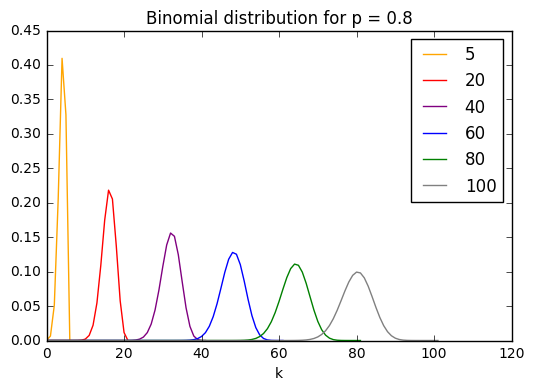

In [24]:
def binomial_fct(n,p) :
    res = []
    for k in range(n+2):
        res.append(binomial(k,n,p))
    return res

def plot_binomial(p) :
    colors = ['orange','red','purple','blue','green','grey']
    i = 0
    nlist = (5,20,40,60,80,100)
    for n in nlist :
        plt.plot(range(n+2),binomial_fct(n,p),color=colors[i])
        plt.xlabel('k')
        plt.title('Binomial distribution for p = %.1f' %p)
        i += 1
    plt.legend(labels = nlist)
    plt.show()
    
## (b)
    
plot_binomial(0.1)
plot_binomial(0.5)
plot_binomial(0.8)

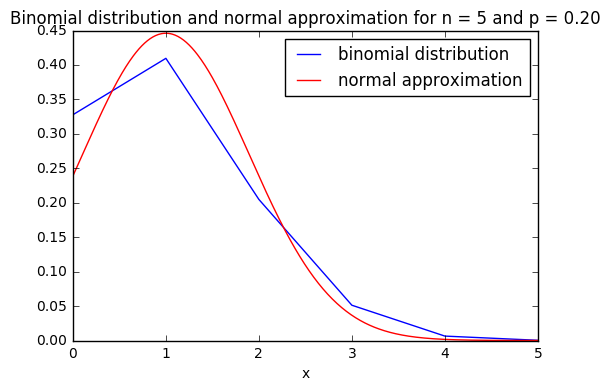

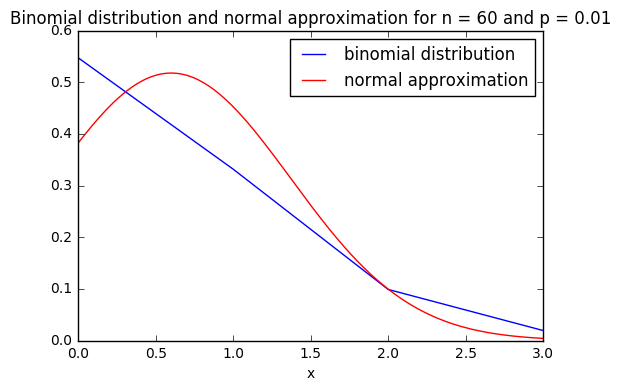

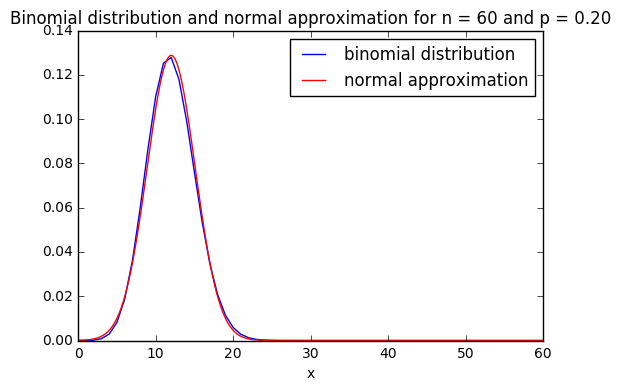

In [25]:
def normal_approx(x,n,p):
    return normal(x,n*p,(n*p*(1-p))**0.5)

def plot_binomial_normal(n,p) :
    x = np.linspace(0,n+2,100*(n+2)+1)
    plt.plot(range(n+2),binomial_fct(n,p),color='blue')
    plt.plot(x,normal_approx(x,n,p),color='red')
    plt.xlabel('x')
    plt.title('Binomial distribution and normal approximation for n = %i and p = %.2f' %(n,p))
    plt.xlim(0,5*n*p)
    plt.legend(labels = ('binomial distribution','normal approximation'))
    plt.show()
    
## (b)
    
plot_binomial_normal(5,0.2)
plot_binomial_normal(60,0.01)
plot_binomial_normal(60,0.2)

The binomial distribution is a good approximation of the binomial distribution if n is large enough (it seems good for n = 60). It is widely used because it is easier ot use and much faster to compute
Above are 2 examples of bad normal approximation because of too small n or p.

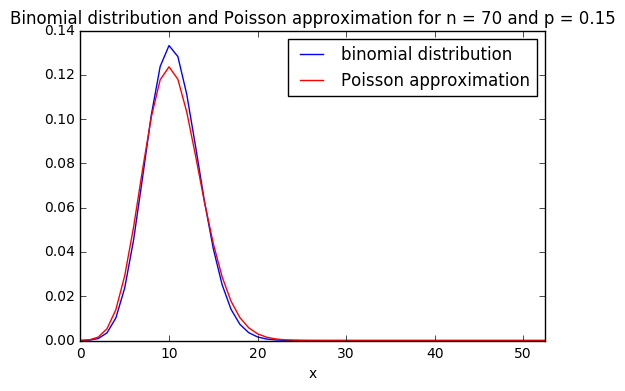

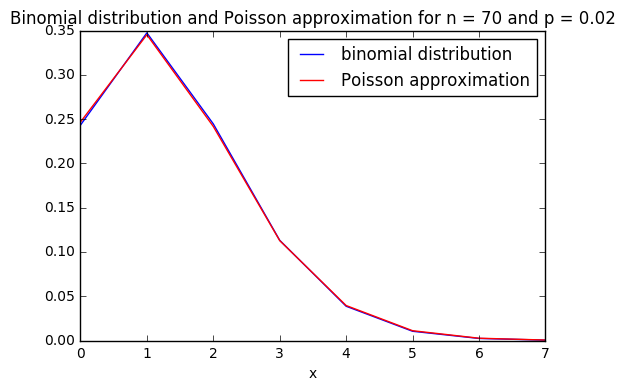

In [26]:
def poisson_approx(k,n,p):
    return poisson(k,n*p)

def poisson_approx_fct(n,p):
    res = []
    for k in range(n+2):
        res.append(poisson_approx(k,n,p))
    return res

def plot_binomial_poisson(n,p) :
    plt.plot(range(n+2),binomial_fct(n,p),color='blue')
    plt.plot(range(n+2),poisson_approx_fct(n,p),color='red')
    plt.xlabel('x')
    plt.title('Binomial distribution and Poisson approximation for n = %i and p = %.2f' %(n,p))
    plt.xlim(0,5*n*p)
    plt.legend(labels = ('binomial distribution','Poisson approximation'))
    plt.show()
    
## (c)

plot_binomial_poisson(70,0.15)
plot_binomial_poisson(70,0.02)

The first graph shows a bad approximation because of a too high p and the second graph shows a good approximation with Poisson law.
This approximation is good for a large number n (at least 20) and a small p (at most 0.05).